In [5]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install pyarrow
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [33]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 126.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 141.3 MB/s eta 0:00:0000:01


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import pyarrow as pq
import matplotlib.pyplot as plt

# From Number 2 PreProcessing and Merge

In [13]:
df_patients = pd.read_parquet('../../fsx1/emory-mimic-icu/tables/patients.parquet')

In [14]:
df_patients=df_patients.drop(["anchor_year_group"], axis=1)

In [15]:
df_patients=df_patients.drop_duplicates()

In [16]:
# Display the DataFrame
df_patients.head()

,subject_id,gender,anchor_age,anchor_year,dod
0,10000100,Male,70,2019,None
1,10000562,Female,18,2016,None
2,10000671,Male,28,2019,None
3,10000683,Male,34,2015,None
4,10000788,Female,83,2017,None


In [17]:
dict_1=pd.Series(df_patients.gender.values,index = df_patients.subject_id).to_dict()
dict_2=pd.Series(df_patients.anchor_age.values,index = df_patients.subject_id).to_dict()
dict_3=pd.Series(df_patients.anchor_year.values,index = df_patients.subject_id).to_dict()
dict_4=pd.Series(df_patients.dod.values,index = df_patients.subject_id).to_dict()

In [18]:
# clean admissions table
def clean_admissions_table(admissions_df):    
    # insurance cleanup 
    ins_cleaning_dict = {
        'MEDICARE A': 'MEDICARE',
        'MEDICARE B': 'MEDICARE',
        'MEDICARE/MGD CARE': 'MEDICARE ADVANTAGE',
        'MEDICARE PART B ONLY': 'MEDICARE ',
        'MEDICARE': 'MEDICARE',
        'MEDICARE B/MCD': 'MEDICARE_MEDICAID',
        'MEDICARE B/MEDICAID': 'MEDICARE_MEDICAID',
        'MEDICARE/MEDICAID': 'MEDICARE_MEDICAID',
        'MGD CARE/MEDICARE': 'MEDICARE ADVANTAGE',
        'MEDICARE/COMMERCIAL': 'MEDICARE ADVANTAGE',
        'MEDICARE B/COMM': 'MEDICARE ADVANTAGE',
        'MEDICARE/BLUE CROSS':'MEDICARE ADVANTAGE',
        'MEDICARE B/BCBS': 'MEDICARE ADVANTAGE',
        'MEDICARE B/MGD CARE': 'MEDICARE ADVANTAGE',
        'MEDICARE/CHAMPUS': 'MEDICARE',
        'MEDICARE B/MISC': 'MEDICARE',
        'MEDICARE B/CHAMPUS': 'MEDICARE',
        
        'MEDICAID': 'MEDICAID',
        'MEDICAID/MGD CARE': 'MEDICARE_MEDICAID',
        'MEDICAID/MEDICARE': 'MEDICARE_MEDICAID',
        'CHAMPUS/MEDICAID': 'MEDICAID',
        'COMMERCIAL/MEDICAID': 'MEDICAID ADVANTAGE',
        'BLUE CROSS/MEDICAID': 'MEDICAID ADVANTAGE',
        'MISC/MEDICAID': 'MEDICAID',
    
        'SELF PAY': 'SELF PAY',
        'SELF-PAY': 'SELF PAY',
    
        'MANAGED CARE': 'MEDICARE ADVANTAGE',
        'MANAGED CARE/BCBS': 'MEDICARE ADVANTAGE',
        'MANAGED CARE/MISC': 'MEDICARE ADVANTAGE',
        'MANAGED CARE/COMM': 'MEDICARE ADVANTAGE',
        'MANAGED CARE/CHAMPUS': 'MEDICARE ADVANTAGE',
        'MISC/MANAGED CARE': 'MEDICARE ADVANTAGE',
    
        'BLUE CROSS': 'PRIVATE',
        'BLUE CROSS/COMM': 'PRIVATE',
        'BLUE CROSS/MEDICARE': 'MEDICARE ADVANTAGE',
        'BLUE CROSS/MGD CARE': 'MEDICARE ADVANTAGE',
        'BLUE CROSS/MISC': 'PRIVATE',
        'BLUE CROSS/BLUE CROS': 'PRIVATE',
        'BLUE CROSS/CHAMPUS': 'PRIVATE',
        'COMMERCIAL/BLUE CROS': 'PRIVATE',
    
        'COMMERCIAL': 'PRIVATE',
        'COMMERCIAL/MGD CARE': 'MEDICARE ADVANTAGE',
        'COMMERCIAL/MISC': 'PRIVATE',
        'COMMERCIAL/MEDICARE': 'MEDICARE ADVANTAGE',
        'COMMERCIAL/MEDICAID': 'MEDICAID ADVANTAGE',
        'COMMERCIAL/CHAMPUS': 'PRIVATE',
        'COMMERCIAL/COMM': 'PRIVATE',
    
        'CHAMPUS': 'GOV',
        'CHAMPUS/CHAMPVA': 'GOV',
        'CHAMPUS/MEDICAID': 'MEDICAID',
        'CHAMPUS/MEDICARE': 'MEDICARE',
        'CHAMPUS/COMMERCIAL': 'PRIVATE',
        'CHAMPUS/MISC': 'GOV',
        'CHAMPUS/MANAGED CARE': 'MEDICARE ADVANTAGE',
    
        'MGD CARE': 'MEDICARE ADVANTAGE',
        'MGD CARE/MEDICARE': 'MEDICARE ADVANTAGE',
        'MGD CARE/MEDICAID': 'MEDICARE_MEDICAID',
        'MGD CARE/BLUE CROSS': 'MEDICARE ADVANTAGE',
        'MGD CARE/CHAMPUS': 'MEDICARE ADVANTAGE',
        'MGD CARE/MGD CARE': 'MEDICARE ADVANTAGE',
    
        'GOVERNMENTAL': 'GOV',
        'GOVT/MISC': 'GOV',
    
        'WORKERS COMP': 'WORKERS COMP',
    
        'MISC': 'MISC',
        'MISC/MEDICARE': 'MEDICARE',
        'MISC/MEDICAID': 'MEDICAID',
        'MISC/BLUE CROSS': 'PRIVATE',
        'MISC/COMMERCIAL': 'PRIVATE',
        'MISC/CHAMPUS': 'GOV',
        'MISC/MISC': 'MISC',
    
        'PRUCARE': 'MISC'
    }
    
    admissions_df['insurance_cat'] = admissions_df['insurance'].map(ins_cleaning_dict)
    
    # drop na columns
    # admissions_df = admissions_df.dropna(axis=1)
    
    # race clean
    race_mapping = {
        '1': 'Unknown, Unavailable or Unreported',
        '2': 'Unknown, Unavailable or Unreported',
        '3': 'Unknown, Unavailable or Unreported',
        'Alaskan Native': 'American or Alaskan or Hawaiian Native',
        'African Am.': 'African American or Black',
        'African American  or Black': "African American or Black",
        'Not Recorded': 'Unknown, Unavailable or Unreported',
        'CD:1594': 'Unknown, Unavailable or Unreported',
        'Asian American': 'Asian',
        'Patient Declines': 'Unknown, Unavailable or Unreported',
        'American Indian or Alaskan Native': 'American or Alaskan or Hawaiian Native',
        'Native Hawaiian or Other Pacific Islander': 'American or Alaskan or Hawaiian Native'
    }
    
    # Replace the values in the "race" column
    admissions_df["race"] = admissions_df["race"].replace(race_mapping)
    
    # keep only the most recent admittime to 
    admissions_df = admissions_df.loc[admissions_df.groupby('subject_id')['admittime'].idxmax()].copy()
    
    admissions_df['insurance_cat'].value_counts(normalize=True)
    
    # drop columns that contain all na
    admissions_df = admissions_df.dropna(axis=1, how='all')
    #print(head(admissions_df))
    print('admission table has been cleaned')
    return admissions_df

In [19]:
admissions_df = pd.read_parquet('../../ICU/tables/admissions.parquet')

In [20]:
admissions_df = clean_admissions_table(admissions_df)
admissions_df['race'].value_counts()

admission table has been cleaned


race
Caucasian or White                        245114
African American or Black                 195607
Unknown, Unavailable or Unreported         29310
Asian                                      15545
Multiple                                    3199
American or Alaskan or Hawaiian Native      2472
Hispanic                                     862
Name: count, dtype: int64

In [21]:
merged_admissions_patients = pd.merge(df_patients, admissions_df, on='subject_id', how='inner')
merged_admissions_patients

,subject_id,gender,anchor_age,anchor_year,dod,hadm_id,admittime,dischtime,deathtime,admission_location,discharge_location,insurance,race,hospital_expire_flag,insurance_cat
0,10000100,Male,70,2019,None,58594204243,2019-06-26 13:20:00,2019-07-05 12:47:00,NaT,PHYSIC OFC/CLINIC,HOME SELF CARE,MEDICARE A,African American or Black,0,MEDICARE
1,10000562,Female,18,2016,None,60707883031,2016-06-02 09:24:00,2016-06-04 15:11:00,NaT,NON-HC FACILITY POO,HOME SELF CARE,MEDICAID,African American or Black,0,MEDICAID
2,10000671,Male,28,2019,None,67252991505,2019-05-14 20:20:00,2019-05-15 13:09:00,NaT,NON-HC FACILITY POO,HOME SELF CARE,SELF PAY,African American or Black,0,SELF PAY
3,10000683,Male,34,2015,None,51017647243,2015-11-10 14:37:00,2015-11-16 19:43:00,NaT,PHYSIC OFC/CLINIC,HOME SELF CARE,MANAGED CARE,Caucasian or White,0,MEDICARE ADVANTAGE
4,10000788,Female,83,2017,None,97722730874,2021-01-08 12:54:00,2021-01-21 16:50:00,NaT,NON-HC FACILITY POO,HOME HEALTH SERVICE,MEDICARE A,Caucasian or White,0,MEDICARE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492104,99999419,Male,47,2015,None,47502667961,2015-09-18 22:56:00,2015-09-21 13:47:00,NaT,NON-HC FACILITY POO,HOME SELF CARE,SELF-PAY,Caucasian or White,0,SELF PAY
492105,99999577,Male,60,2019,None,72376111354,2019-04-23 15:16:00,2019-04-24 19:51:00,NaT,TFR FROM OTHER HCF,HOME SELF CARE,MANAGED CARE,Caucasian or White,0,MEDICARE ADVANTAGE
492106,99999731,Male,38,2009,None,55258667078,2010-11-20 13:01:00,2010-11-21 18:45:00,NaT,NON-HC FACILITY POO,HOME SELF CARE,MANAGED CARE,African American or Black,0,MEDICARE ADVANTAGE
492107,99999856,Female,69,2019,None,39743800534,2019-09-21 08:20:00,2019-09-23 15:45:00,NaT,NON-HC FACILITY POO,HOME SELF CARE,MEDICARE,Caucasian or White,0,MEDICARE


In [22]:
merged_admissions_patients=merged_admissions_patients.drop(["anchor_year", "admittime", "dischtime", "deathtime", "discharge_location", "insurance"], axis=1)

In [23]:
merged_admissions_patients.drop_duplicates()

,subject_id,gender,anchor_age,dod,hadm_id,admission_location,race,hospital_expire_flag,insurance_cat
0,10000100,Male,70,None,58594204243,PHYSIC OFC/CLINIC,African American or Black,0,MEDICARE
1,10000562,Female,18,None,60707883031,NON-HC FACILITY POO,African American or Black,0,MEDICAID
2,10000671,Male,28,None,67252991505,NON-HC FACILITY POO,African American or Black,0,SELF PAY
3,10000683,Male,34,None,51017647243,PHYSIC OFC/CLINIC,Caucasian or White,0,MEDICARE ADVANTAGE
4,10000788,Female,83,None,97722730874,NON-HC FACILITY POO,Caucasian or White,0,MEDICARE
...,...,...,...,...,...,...,...,...,...
492104,99999419,Male,47,None,47502667961,NON-HC FACILITY POO,Caucasian or White,0,SELF PAY
492105,99999577,Male,60,None,72376111354,TFR FROM OTHER HCF,Caucasian or White,0,MEDICARE ADVANTAGE
492106,99999731,Male,38,None,55258667078,NON-HC FACILITY POO,African American or Black,0,MEDICARE ADVANTAGE
492107,99999856,Female,69,None,39743800534,NON-HC FACILITY POO,Caucasian or White,0,MEDICARE


In [24]:
merged_admissions_patients['gender'].value_counts()

gender
Female     284514
Male       207592
Unknown         3
Name: count, dtype: int64

# New Code & Heat Map

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [56]:
admissions_patients_analyze = merged_admissions_patients[['gender','admission_location','race','hospital_expire_flag','insurance_cat','anchor_age']]
admissions_patients_analyze.columns

Index(['gender', 'admission_location', 'race', 'hospital_expire_flag',
       'insurance_cat', 'anchor_age'],
      dtype='object')

In [58]:
# Initialize the LabelEncoder
le = LabelEncoder()

admissions_patients_analyze['gender'] = le.fit_transform(admissions_patients_analyze['gender'])
admissions_patients_analyze['admission_location'] = le.fit_transform(admissions_patients_analyze['admission_location'])
admissions_patients_analyze['race'] = le.fit_transform(admissions_patients_analyze['race'])
admissions_patients_analyze['hospital_expire_flag'] = le.fit_transform(admissions_patients_analyze['hospital_expire_flag'])
admissions_patients_analyze['insurance_cat'] = le.fit_transform(admissions_patients_analyze['insurance_cat'])

/tmp/ipykernel_3980/3012720305.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  admissions_patients_analyze['gender'] = le.fit_transform(admissions_patients_analyze['gender'])
/tmp/ipykernel_3980/3012720305.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  admissions_patients_analyze['admission_location'] = le.fit_transform(admissions_patients_analyze['admission_location'])
/tmp/ipykernel_3980/3012720305.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [59]:
admissions_patients_analyze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492109 entries, 0 to 492108
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   gender                492109 non-null  int64
 1   admission_location    492109 non-null  int64
 2   race                  492109 non-null  int64
 3   hospital_expire_flag  492109 non-null  int64
 4   insurance_cat         492109 non-null  int64
 5   anchor_age            492109 non-null  int16
dtypes: int16(1), int64(5)
memory usage: 19.7 MB


In [61]:
correlation_matrix = admissions_patients_analyze.corr()
# Display the correlation matrix
correlation_matrix

,gender,admission_location,race,hospital_expire_flag,insurance_cat,anchor_age
gender,1.000000,0.077395,0.116903,0.063153,0.075779,0.150969
admission_location,0.077395,1.000000,0.087047,0.138103,-0.031250,0.120044
race,0.116903,0.087047,1.000000,0.004903,0.110350,0.160169
hospital_expire_flag,0.063153,0.138103,0.004903,1.000000,-0.046655,0.165346
insurance_cat,0.075779,-0.031250,0.110350,-0.046655,1.000000,-0.089395
anchor_age,0.150969,0.120044,0.160169,0.165346,-0.089395,1.000000


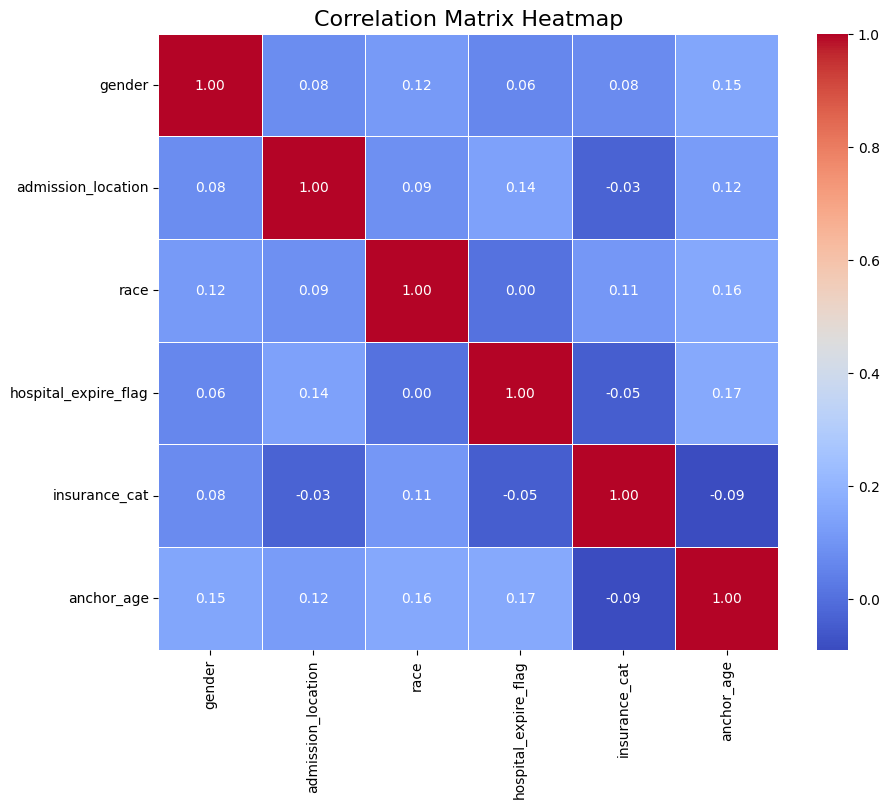

In [62]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Matrix Heatmap', fontsize=16)

# Display the heatmap
plt.show()